## Building Real-time Data Requests

In [1]:
import datetime
import time
import requests
import pprint
from concurrent.futures import ThreadPoolExecutor

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.gridspec as gridspec
import netCDF4 as nc
import numpy as np

from IPython import display

In this example we will build real-time requests for data from the Cabled Axial Base (RS03AXPS) - Shallow Profiler (SF03A) - CTD (2A-CTDPFA302) sensor. The ingredients being used to build the data_request_url can be found here: http://ooi.visualocean.net/instruments/view/RS03AXPS-SF03A-2A-CTDPFA302

In [2]:
subsite = 'RS03AXPS'
node = 'SF03A'
sensor = '2A-CTDPFA302'
method = 'streamed'
stream = 'ctdpf_sbe43_sample'

Login in at https://ooinet.oceanobservatories.org/ and obtain your username and token under your profile (top right corner).

In [3]:
username = ''
token = ''

base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

Set up starting conditions. The code will request the last 10 seconds of data and then make a new request every second by replacing the request url start time with the time stamp of the last data point received. No end time is specified, so everything available up until present will be returned, and the limit is set to 1000 data points for any given request, though no sensor is sampling at 100 Hz. If no limit is set, the system will produce full resolution NetCDF data on thredds, instead of returning the data as a JSON object right inside this notebook.

In [4]:
beginDT = (datetime.datetime.utcnow() - datetime.timedelta(seconds=10)).strftime("%Y-%m-%dT%H:%M:%S.000Z")

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'limit':1000,   
}

KeyboardInterrupt: 

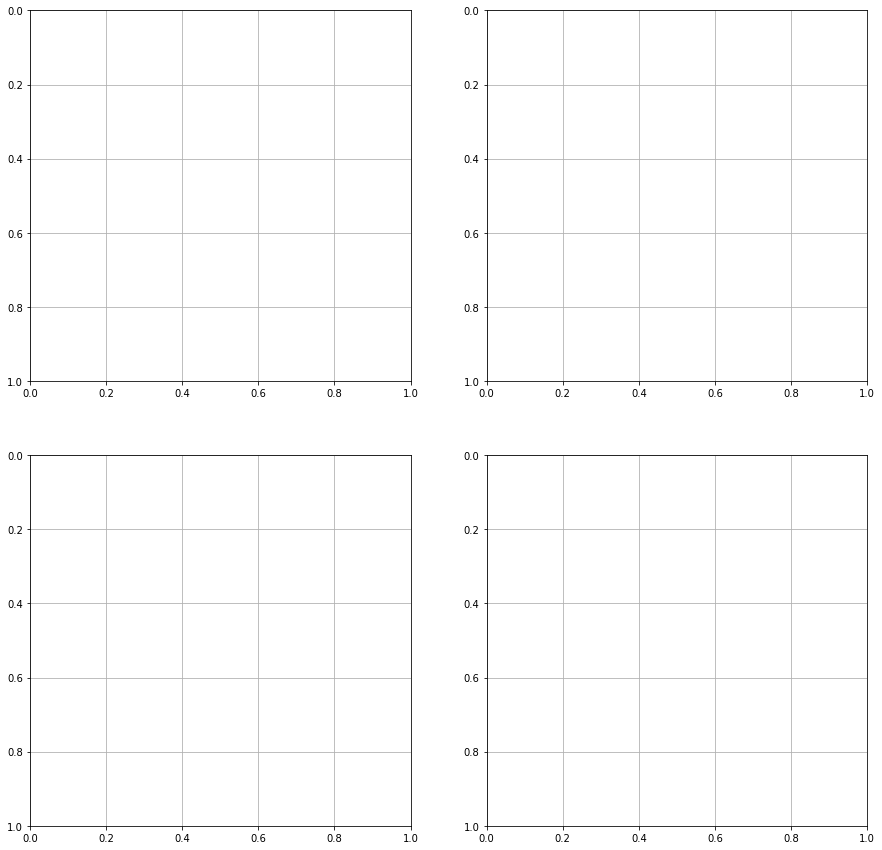

In [21]:
time_stamp = []
pressure = []
temperature = []
salinity = []
oxygen = []
conductivity = []

fig = plt.figure(figsize=(15, 15))
spec = gridspec.GridSpec(ncols=2, nrows=2)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1], sharey=ax1)
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1], sharey=ax3)

ax1.invert_yaxis()
ax3.invert_yaxis()

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

for i in range(100):
    response = requests.get(data_request_url, params=params, auth=(username, token))
    data = response.json()
    
    for i in range(len(data)):
        time_stamp.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
        pressure.append(data[i]['seawater_pressure'])
        temperature.append(data[i]['seawater_temperature'])
        oxygen.append(data[i]['corrected_dissolved_oxygen'])
        salinity.append(data[i]['practical_salinity'])
        conductivity.append(data[i]['seawater_conductivity'])
          
    try:
        cb1.remove()
        cb2.remove()
        cb3.remove()
        cb4.remove()
    except:
        pass

    ax1.set_xlim(time_stamp[0],time_stamp[-1])
    ax2.set_xlim(time_stamp[0],time_stamp[-1])
    ax3.set_xlim(time_stamp[0],time_stamp[-1])
    ax4.set_xlim(time_stamp[0],time_stamp[-1])
    
    cmap1 = plt.get_cmap("Reds")
    cmap2 = plt.get_cmap("winter_r")
#     cmap3 = plt.get_cmap("copper")
#     cmap4 = plt.get_cmap("copper")
    
    t = ax1.scatter(time_stamp, pressure, c=temperature, cmap=cmap1)
    o = ax2.scatter(time_stamp, pressure, c=oxygen, cmap=cmap2)
    s = ax3.scatter(time_stamp, pressure, c=salinity)
    c = ax4.scatter(time_stamp, pressure, c=conductivity)
    
    cb1 = plt.colorbar(t,ax=ax1)
    cb2 = plt.colorbar(o,ax=ax2)
    cb3 = plt.colorbar(s,ax=ax3)
    cb4 = plt.colorbar(c,ax=ax4)

    cb1.set_label('$^\circ$C')
    cb2.set_label('umol/Kg')
    cb3.set_label('1')
    cb4.set_label('S/m')
    
    ax1.set_title("Temperature")
    ax2.set_title("Oxygen")
    ax3.set_title("Salinity")
    ax4.set_title("Conductivity")
    
    ax1.set_ylabel('dbar')
    ax3.set_ylabel('dbar')
    
    ax2.set_xlabel('time')
    ax4.set_xlabel('time')
    
    spec.tight_layout(fig)
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
        
    params['beginDT'] = nc.num2date(data[-1]['time'],'seconds since 1900-01-01').strftime("%Y-%m-%dT%H:%M:%S.000Z")



In [29]:
beginDT = (datetime.datetime.utcnow() - datetime.timedelta(days=0.3)).strftime("%Y-%m-%dT%H:%M:%S.000Z")

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'limit':20000,   
}

time_stamp = []
pressure = []
temperature = []
salinity = []
oxygen = []
conductivity = []


response = requests.get(data_request_url, params=params, auth=(username, token))
data = response.json()

for i in range(len(data)):
    time_stamp.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
    pressure.append(data[i]['seawater_pressure'])
    temperature.append(data[i]['seawater_temperature'])
    oxygen.append(data[i]['corrected_dissolved_oxygen'])
    salinity.append(data[i]['practical_salinity'])
    conductivity.append(data[i]['seawater_conductivity'])

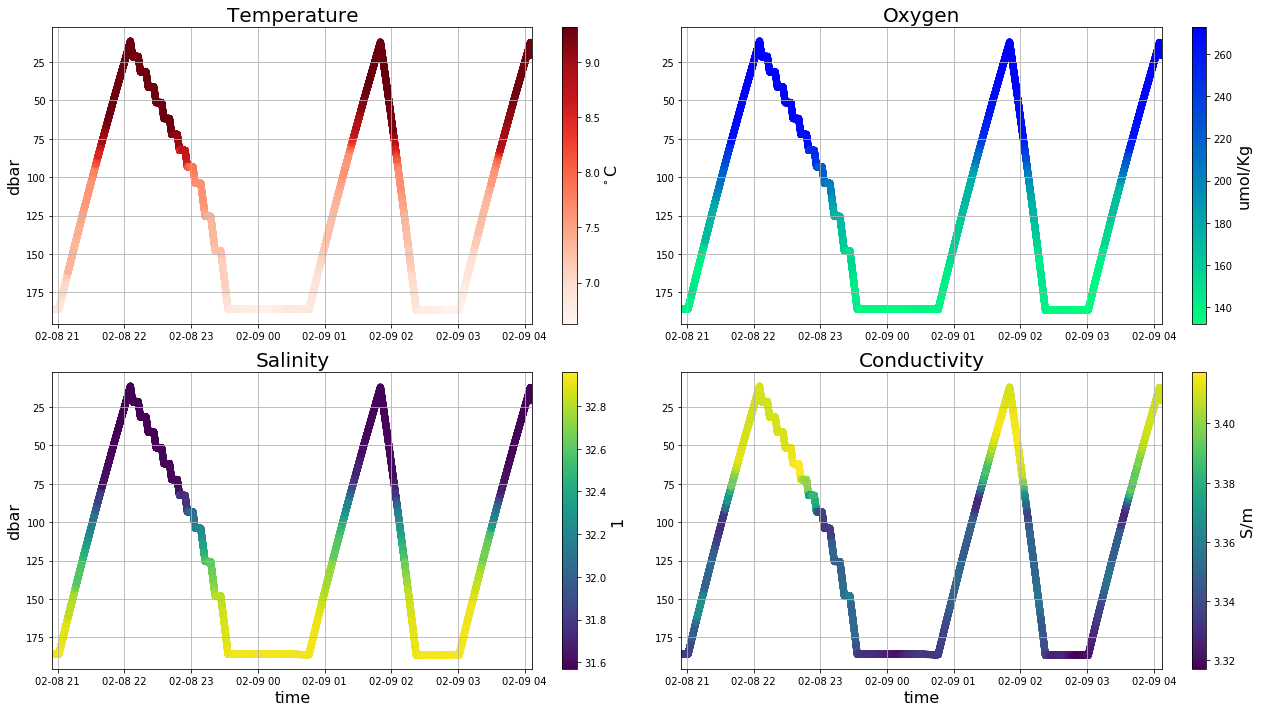

In [30]:
fig = plt.figure(figsize=(18, 10))
spec = gridspec.GridSpec(ncols=2, nrows=2)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1], sharey=ax1)
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1], sharey=ax3)

ax1.invert_yaxis()
ax3.invert_yaxis()

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.set_xlim(time_stamp[0],time_stamp[-1])
ax2.set_xlim(time_stamp[0],time_stamp[-1])
ax3.set_xlim(time_stamp[0],time_stamp[-1])
ax4.set_xlim(time_stamp[0],time_stamp[-1])

cmap1 = plt.get_cmap("Reds")
cmap2 = plt.get_cmap("winter_r")
#     cmap3 = plt.get_cmap("copper")
#     cmap4 = plt.get_cmap("copper")

t = ax1.scatter(time_stamp, pressure, c=temperature, cmap=cmap1)
o = ax2.scatter(time_stamp, pressure, c=oxygen, cmap=cmap2)
s = ax3.scatter(time_stamp, pressure, c=salinity)
c = ax4.scatter(time_stamp, pressure, c=conductivity)

cb1 = plt.colorbar(t,ax=ax1)
cb2 = plt.colorbar(o,ax=ax2)
cb3 = plt.colorbar(s,ax=ax3)
cb4 = plt.colorbar(c,ax=ax4)

cb1.set_label('$^\circ$C', fontsize=16)
cb2.set_label('umol/Kg', fontsize=16)
cb3.set_label('1', fontsize=16)
cb4.set_label('S/m', fontsize=16)

ax1.set_title("Temperature", fontsize=20)
ax2.set_title("Oxygen", fontsize=20)
ax3.set_title("Salinity", fontsize=20)
ax4.set_title("Conductivity", fontsize=20)

ax1.set_ylabel('dbar', fontsize=16)
ax3.set_ylabel('dbar', fontsize=16)

ax3.set_xlabel('time', fontsize=16)
ax4.set_xlabel('time', fontsize=16)

spec.tight_layout(fig)

# fig.savefig('plot.png')

In [31]:
fig.savefig('out.png')

In [ ]:
response = requests.get(data_request_url, params=params, auth=(username, token))
data = response.json()

In [ ]:
data

In [ ]:
import matplotlib.dates as mdates

time_stamp = []
pressure = []
temperature = []

plt.figure(figsize=(20,10))
plt.grid()
ax = plt.gca()
ax.invert_yaxis()


for i in range(1000):
    response = requests.get(data_request_url, params=params, auth=(username, token))
    data = response.json()
    
    for i in range(len(data)):
        time_stamp.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
        pressure.append(data[i]['seawater_pressure'])
        temperature.append(data[i]['seawater_temperature'])
          
    try:
        cb.remove()
    except:
        pass

    plt.xlim(time_stamp[0],time_stamp[-1])
    sc = plt.scatter(time_stamp, pressure, c=temperature)
    cb = plt.colorbar(sc)
    
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
        
    params['beginDT'] = nc.num2date(data[-1]['time'],'seconds since 1900-01-01').strftime("%Y-%m-%dT%H:%M:%S.000Z")



In [ ]:
beginDT = (datetime.datetime.utcnow() - datetime.timedelta(days=2)).strftime("%Y-%m-%dT%H:%M:%S.000Z")

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'limit':20000,   
}

time_stamp = []
pressure = []
temperature = []

response = requests.get(data_request_url, params=params, auth=(username, token))
data = response.json()

for i in range(len(data)):
    time_stamp.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
    pressure.append(data[i]['seawater_pressure'])
    temperature.append(data[i]['corrected_dissolved_oxygen'])

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
ax = plt.gca()
ax.invert_yaxis()

    
try:
    cb.remove()
except:
    pass

plt.xlim(time_stamp[0],time_stamp[-1])
sc = plt.scatter(time_stamp, pressure, c=temperature)
plt.colorbar(sc)
# plt.show

# ax.get_yaxis().get_major_formatter().set_useOffset(False)

# display.clear_output(wait=True)
# display.display(plt.gcf())
